# Application du modèle économétrique

Nous allons appliquer notre modèle translog aux différentes variables construites précédemment. 


In [1]:
import os 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
import statsmodels.api as sm

## 1. Construction de la base nécessaire à l'application du modèle

On crée une base contenant la variable d'intérêt Y (les points ISA), les variables explicatives et les variables de contrôle.

In [2]:
VAR_EXPL = pd.read_csv('C:/Users/mille/OneDrive/Documents/ENSAE/2ème année/Stat App/VAR_EXPL.csv')
VAR_EXPL_SPL = pd.read_csv('C:/Users/mille/OneDrive/Documents/ENSAE/2ème année/Stat App/VAR_EXPL_SPL.csv')
VAR_CTRL = pd.read_csv('C:/Users/mille/OneDrive/Documents/GitHub/Hopitaux_Production/Variables_controle.csv')
VAR_CTRL

,Numero_finess,Points_ISA,stjr,dep,Departement,COMINSEE,Capital_Lit_MCO,Capital_Bloc,Capital_imagerie,Capital_Examens_biologiques,...,SEJHC_OBS,SEJHC_MCO,Taux_chomage_par_dep,Population,Dep Moyenne Salaires Horaires,Dep Moyenne Salaires Cadre Horaires,Dep Moyenne Salaires Prof Intermédiaire Horaires,Dep Moyenne Salaires Employé Horaires,Moyenne Revenus Fiscaux Départementaux,Bloc_politique
0,060000528,356892.030000,3,06,Alpes-Maritimes,06088,128.0,8.0,9.0,909.0,...,0.0,7020.0,8.9,343123.0,12.579245,22.518868,12.864151,8.835849,12288.0,Centre droit à droite
1,060780947,174552.540000,3,06,Alpes-Maritimes,06088,105.0,5.0,4.0,0.0,...,0.0,9754.0,8.9,343123.0,12.579245,22.518868,12.864151,8.835849,12288.0,Centre droit à droite
2,060791811,146432.633333,3,06,Alpes-Maritimes,06088,91.0,2.0,2.0,0.0,...,0.0,2558.0,8.9,343123.0,12.579245,22.518868,12.864151,8.835849,12288.0,Centre droit à droite
3,060780442,22842.380000,2,06,Alpes-Maritimes,06088,30.0,6.0,1.0,0.0,...,0.0,1605.0,8.9,343123.0,12.579245,22.518868,12.864151,8.835849,12288.0,Centre droit à droite
4,060780715,342051.171667,2,06,Alpes-Maritimes,06088,256.0,26.0,10.0,0.0,...,1467.0,15866.0,8.9,343123.0,12.579245,22.518868,12.864151,8.835849,12288.0,Centre droit à droite
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1155,120780085,45665.700000,1,12,Aveyron,12089,34.0,5.0,3.0,235068.0,...,0.0,2056.0,6.4,6787.0,10.115789,20.252632,11.963158,8.478947,9936.0,Extrême gauche à gauche
1156,480780097,240863.268333,1,48,Lozère,48095,67.0,6.0,6.0,423436.0,...,392.0,3599.5,5.3,11792.0,10.075000,20.475000,11.775000,8.600000,8555.0,Centre gauche à centre droit
1157,480780162,5699.150000,1,48,Lozère,48080,23.0,0.0,1.0,0.0,...,0.0,421.0,5.3,3097.0,10.075000,20.475000,11.775000,8.600000,8555.0,Centre gauche à centre droit
1158,480780121,2396.450000,1,48,Lozère,48140,22.0,0.0,0.0,0.0,...,0.0,205.0,5.3,4319.0,10.075000,20.475000,11.775000,8.600000,8555.0,Centre droit à droite


In [3]:
del VAR_EXPL['Unnamed: 0']
del VAR_EXPL_SPL['Unnamed: 0']

In [4]:
VAR_EXPL.columns

Index(['Numero_finess', 'Médecins libéraux',
       'Autres personnels médicaux libéraux', 'Médecins salariés',
       'Autres personnels médicaux salariés',
       'Personnels de direction et administratifs',
       'Personnels des services de soins', 'Personnels éducatifs et sociaux',
       'Personnels médico-techniques', 'Personnels techniques et ouvriers',
       'Points_ISA', 'stjr', 'Internes'],
      dtype='object')

In [5]:
df = pd.merge(VAR_EXPL, VAR_CTRL, on=['Numero_finess'])
df.rename(columns = {'Points_ISA_x': 'Points_ISA', 'stjr_x': 'stjr'}, inplace=True)
df.drop(['Points_ISA_y','stjr_y'], axis=1, inplace=True)


In [6]:
df = pd.merge(df, VAR_EXPL_SPL)
df

,Numero_finess,Médecins libéraux,Autres personnels médicaux libéraux,Médecins salariés,Autres personnels médicaux salariés,Personnels de direction et administratifs,Personnels des services de soins,Personnels éducatifs et sociaux,Personnels médico-techniques,Personnels techniques et ouvriers,...,Dep Moyenne Salaires Horaires,Dep Moyenne Salaires Cadre Horaires,Dep Moyenne Salaires Prof Intermédiaire Horaires,Dep Moyenne Salaires Employé Horaires,Moyenne Revenus Fiscaux Départementaux,Bloc_politique,Personnel médical,Autre sans internes,Autre sans direction et administratif,Autre sans techniques et ouvriers
0,010007300,4.5,3.0,0.000,0.00,2.250000,4.200000,NaN,NaN,NaN,...,11.410345,21.963793,12.558621,8.743103,12509.0,Centre gauche à centre droit,7.500,NaN,NaN,NaN
1,010008407,0.0,0.0,18.490,14.33,21.196667,97.323333,0.846667,9.206667,26.440,...,11.410345,21.963793,12.558621,8.743103,12509.0,Droite à extrême droite,32.820,57.690,36.493333,31.250
2,010009132,0.0,0.0,1.795,0.07,4.175000,46.700000,1.065000,1.130000,13.465,...,11.410345,21.963793,12.558621,8.743103,12509.0,Droite à extrême droite,1.865,19.835,15.660000,6.370
3,010780054,4.5,1.0,102.600,44.53,118.605000,388.590000,4.930000,107.660000,112.630,...,11.410345,21.963793,12.558621,8.743103,12509.0,Centre droit à droite,152.630,343.825,420.310000,426.285
4,010780062,0.0,0.0,19.450,10.10,58.450000,336.540000,5.450000,29.320000,57.570,...,11.410345,21.963793,12.558621,8.743103,12509.0,Centre gauche à centre droit,29.550,150.790,98.790000,99.670
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1145,950300277,29.5,16.0,4.060,3.00,74.950000,246.990000,1.100000,6.460000,14.460,...,13.710526,22.919737,13.531579,9.663158,8826.0,Extrême gauche à gauche,52.560,96.970,22.020000,82.510
1146,950300301,2.0,0.5,6.970,1.80,22.560000,103.560000,1.380000,2.940000,3.000,...,13.710526,22.919737,13.531579,9.663158,8826.0,Extrême gauche à gauche,11.270,29.880,7.320000,26.880
1147,950300350,5.5,6.5,1.000,0.80,6.600000,27.550000,NaN,3.000000,1.000,...,13.710526,22.919737,13.531579,9.663158,8826.0,Centre gauche à centre droit,13.800,NaN,NaN,NaN
1148,950630012,0.0,0.0,11.300,2.50,23.070000,177.880000,39.070000,5.330000,12.700,...,13.710526,22.919737,13.531579,9.663158,8826.0,Centre gauche à centre droit,13.800,80.170,59.590000,69.960


On obtient bien 1152 établissements (inchallah), le nombre d'établissements qui avaient des données dans les bases du personnel. On n'a donc pas pris en compte les établissements présents dans la base des variables explicatives mais dont on ne pouvait rien dire, faute de données sur leur personnel.  

On construit des variables plus générales pour nos premières analyses : on regroupe les différentes mesures des ressources techniques des hôpitaux dans la variable Capital_Tech et les différents types de personnels libéraux et salariés dans les mêmes catégorie.

In [7]:
df = df.assign(Capital_tech = df['Capital_Bloc'] + df['Capital_imagerie'] + df['Capital_Examens_biologiques'] 
               + df['Capital_telemed'], 
              Médecins = df['Médecins libéraux'] + df['Médecins salariés'],
              Autres_personnels_médicaux = df['Autres personnels médicaux libéraux'] +df['Autres personnels médicaux salariés'])
df

,Numero_finess,Médecins libéraux,Autres personnels médicaux libéraux,Médecins salariés,Autres personnels médicaux salariés,Personnels de direction et administratifs,Personnels des services de soins,Personnels éducatifs et sociaux,Personnels médico-techniques,Personnels techniques et ouvriers,...,Dep Moyenne Salaires Employé Horaires,Moyenne Revenus Fiscaux Départementaux,Bloc_politique,Personnel médical,Autre sans internes,Autre sans direction et administratif,Autre sans techniques et ouvriers,Capital_tech,Médecins,Autres_personnels_médicaux
0,010007300,4.5,3.0,0.000,0.00,2.250000,4.200000,NaN,NaN,NaN,...,8.743103,12509.0,Centre gauche à centre droit,7.500,NaN,NaN,NaN,1.0,4.500,3.00
1,010008407,0.0,0.0,18.490,14.33,21.196667,97.323333,0.846667,9.206667,26.440,...,8.743103,12509.0,Droite à extrême droite,32.820,57.690,36.493333,31.250,265754.0,18.490,14.33
2,010009132,0.0,0.0,1.795,0.07,4.175000,46.700000,1.065000,1.130000,13.465,...,8.743103,12509.0,Droite à extrême droite,1.865,19.835,15.660000,6.370,0.0,1.795,0.07
3,010780054,4.5,1.0,102.600,44.53,118.605000,388.590000,4.930000,107.660000,112.630,...,8.743103,12509.0,Centre droit à droite,152.630,343.825,420.310000,426.285,954720.0,107.100,45.53
4,010780062,0.0,0.0,19.450,10.10,58.450000,336.540000,5.450000,29.320000,57.570,...,8.743103,12509.0,Centre gauche à centre droit,29.550,150.790,98.790000,99.670,8.0,19.450,10.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1145,950300277,29.5,16.0,4.060,3.00,74.950000,246.990000,1.100000,6.460000,14.460,...,9.663158,8826.0,Extrême gauche à gauche,52.560,96.970,22.020000,82.510,8.0,33.560,19.00
1146,950300301,2.0,0.5,6.970,1.80,22.560000,103.560000,1.380000,2.940000,3.000,...,9.663158,8826.0,Extrême gauche à gauche,11.270,29.880,7.320000,26.880,0.0,8.970,2.30
1147,950300350,5.5,6.5,1.000,0.80,6.600000,27.550000,NaN,3.000000,1.000,...,9.663158,8826.0,Centre gauche à centre droit,13.800,NaN,NaN,NaN,7.0,6.500,7.30
1148,950630012,0.0,0.0,11.300,2.50,23.070000,177.880000,39.070000,5.330000,12.700,...,9.663158,8826.0,Centre gauche à centre droit,13.800,80.170,59.590000,69.960,0.0,11.300,2.50


Nous décidons de traiter les valeurs manquantes en les remplaçant par des valeurs nulles. Nous montrerons plus tard que cela n'affecte pas nos résultats.

In [8]:
df_nanull = df.fillna(0)

In [9]:
df.columns

Index(['Numero_finess', 'Médecins libéraux',
       'Autres personnels médicaux libéraux', 'Médecins salariés',
       'Autres personnels médicaux salariés',
       'Personnels de direction et administratifs',
       'Personnels des services de soins', 'Personnels éducatifs et sociaux',
       'Personnels médico-techniques', 'Personnels techniques et ouvriers',
       'Points_ISA', 'stjr', 'Internes', 'dep', 'Departement', 'COMINSEE',
       'Capital_Lit_MCO', 'Capital_Bloc', 'Capital_imagerie',
       'Capital_Examens_biologiques', 'Capital_telemed', 'SEJHC_MED',
       'SEJHC_CHI', 'SEJHC_OBS', 'SEJHC_MCO', 'Taux_chomage_par_dep',
       'Population', 'Dep Moyenne Salaires Horaires',
       'Dep Moyenne Salaires Cadre Horaires',
       'Dep Moyenne Salaires Prof Intermédiaire Horaires',
       'Dep Moyenne Salaires Employé Horaires',
       'Moyenne Revenus Fiscaux Départementaux', 'Bloc_politique',
       'Personnel médical', 'Autre sans internes',
       'Autre sans direction et ad

In [10]:
#Nous passons en log tous les variables que l'on va utiliser comme facteur de production dans notre fonction translog

df_log = df_nanull.apply(lambda x: np.log(x) if x.name in ['Médecins libéraux', 'Autres personnels médicaux libéraux', 
                                                    'Médecins salariés', 'Autres personnels médicaux salariés',
                                                    'Médecins', 'Autres_personnels_médicaux',      
                                                    'Personnels de direction et administratifs',
                                                    'Personnels des services de soins', 'Personnels éducatifs et sociaux',
                                                    'Personnels médico-techniques', 'Personnels techniques et ouvriers',
                                                    'Personnel médical', 'Autre sans internes',
                                                    'Autre sans direction et administratif',
                                                    'Autre sans techniques et ouvriers',
                                                    'Points_ISA', 'Internes', 'Capital_Lit_MCO',
                                                    'Capital_Bloc', 'Capital_imagerie', 'Capital_Examens_biologiques',
                                                    'Capital_telemed', 'Capital_tech'] else x)

#On remplace les valeurs -infini apparues après l'application du log par la valeur -3 c'est-à-dire log(0.001)
from numpy import inf
df_log = df_log.replace(-inf, -3)

df_log

C:\Users\mille\anaconda3\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,Numero_finess,Médecins libéraux,Autres personnels médicaux libéraux,Médecins salariés,Autres personnels médicaux salariés,Personnels de direction et administratifs,Personnels des services de soins,Personnels éducatifs et sociaux,Personnels médico-techniques,Personnels techniques et ouvriers,...,Dep Moyenne Salaires Employé Horaires,Moyenne Revenus Fiscaux Départementaux,Bloc_politique,Personnel médical,Autre sans internes,Autre sans direction et administratif,Autre sans techniques et ouvriers,Capital_tech,Médecins,Autres_personnels_médicaux
0,010007300,1.504077,1.098612,-3.000000,-3.000000,0.810930,1.435085,-3.000000,-3.000000,-3.000000,...,8.743103,12509.0,Centre gauche à centre droit,2.014903,-3.000000,-3.000000,-3.000000,0.000000,1.504077,1.098612
1,010008407,-3.000000,-3.000000,2.917230,2.662355,3.053844,4.578039,-0.166448,2.219928,3.274878,...,8.743103,12509.0,Droite à extrême droite,3.491038,4.055084,3.597130,3.442019,12.490326,2.917230,2.662355
2,010009132,-3.000000,-3.000000,0.585005,-2.659260,1.429114,3.843744,0.062975,0.122218,2.600094,...,8.743103,12509.0,Droite à extrême droite,0.623261,2.987448,2.751110,1.851599,-3.000000,0.585005,-2.659260
3,010780054,1.504077,0.000000,4.630838,3.796163,4.775799,5.962525,1.595339,4.678978,4.724108,...,8.743103,12509.0,Centre droit à droite,5.028017,5.840133,6.040993,6.055108,13.769173,4.673763,3.818371
4,010780062,-3.000000,-3.000000,2.967847,2.312535,4.068172,5.818717,1.695616,3.378270,4.053002,...,8.743103,12509.0,Centre gauche à centre droit,3.386084,5.015888,4.592996,4.601865,2.079442,2.967847,2.312535
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1145,950300277,3.384390,2.772589,1.401183,1.098612,4.316821,5.509348,0.095310,1.865629,2.671386,...,9.663158,8826.0,Extrême gauche à gauche,3.961955,4.574402,3.091951,4.412919,2.079442,3.513335,2.944439
1146,950300301,0.693147,-0.693147,1.941615,0.587787,3.116178,4.640151,0.322083,1.078410,1.098612,...,9.663158,8826.0,Extrême gauche à gauche,2.422144,3.397189,1.990610,3.291383,-3.000000,2.193886,0.832909
1147,950300350,1.704748,1.871802,0.000000,-0.223144,1.887070,3.316003,-3.000000,1.098612,0.000000,...,9.663158,8826.0,Centre gauche à centre droit,2.624669,-3.000000,-3.000000,-3.000000,1.945910,1.871802,1.987874
1148,950630012,-3.000000,-3.000000,2.424803,0.916291,3.138533,5.181109,3.665355,1.673351,2.541602,...,9.663158,8826.0,Centre gauche à centre droit,2.624669,4.384149,4.087488,4.247924,-3.000000,2.424803,0.916291


In [11]:
dfm = df_log.copy()
for i in ['Personnel médical', 'Autre sans internes',
            'Autre sans direction et administratif',
            'Autre sans techniques et ouvriers',
            'Personnels de direction et administratifs',
            'Personnels des services de soins',
            'Personnels techniques et ouvriers',
            'Internes', 'Capital_Lit_MCO','Capital_tech',
             'Capital_Bloc', 'Capital_imagerie', 'Capital_Examens_biologiques']:
    for j in ['Personnel médical', 'Autre sans internes',
            'Autre sans direction et administratif',
            'Autre sans techniques et ouvriers',
            'Personnels de direction et administratifs',
            'Personnels des services de soins',
            'Personnels techniques et ouvriers',
            'Internes', 'Capital_Lit_MCO','Capital_tech',
            'Capital_Bloc', 'Capital_imagerie', 'Capital_Examens_biologiques']:
        if i >= j :
            dfm.insert(0, i + ' x ' + j, df_log[i]*df_log[j])
    
dfm

,Capital_Examens_biologiques x Capital_Examens_biologiques,Capital_Examens_biologiques x Capital_Bloc,Capital_Examens_biologiques x Autre sans techniques et ouvriers,Capital_Examens_biologiques x Autre sans direction et administratif,Capital_Examens_biologiques x Autre sans internes,Capital_imagerie x Capital_Examens_biologiques,Capital_imagerie x Capital_imagerie,Capital_imagerie x Capital_Bloc,Capital_imagerie x Capital_Lit_MCO,Capital_imagerie x Autre sans techniques et ouvriers,...,Dep Moyenne Salaires Employé Horaires,Moyenne Revenus Fiscaux Départementaux,Bloc_politique,Personnel médical,Autre sans internes,Autre sans direction et administratif,Autre sans techniques et ouvriers,Capital_tech,Médecins,Autres_personnels_médicaux
0,9.000000,-0.000000,9.000000,9.000000,9.000000,9.000000,9.000000,-0.000000,9.000000,9.000000,...,8.743103,12509.0,Centre gauche à centre droit,2.014903,-3.000000,-3.000000,-3.000000,0.000000,1.504077,1.098612
1,156.007124,24.304965,42.991790,44.929160,50.649138,20.102332,2.590290,3.131822,7.443607,5.539716,...,8.743103,12509.0,Droite à extrême droite,3.491038,4.055084,3.597130,3.442019,12.490326,2.917230,2.662355
2,9.000000,9.000000,-5.554798,-8.253329,-8.962344,9.000000,9.000000,9.000000,-6.907755,-5.554798,...,8.743103,12509.0,Droite à extrême droite,0.623261,2.987448,2.751110,1.851599,-3.000000,0.585005,-2.659260
3,189.589443,34.215048,83.373682,83.179322,80.413654,31.704635,5.301898,5.721709,13.610112,13.942402,...,8.743103,12509.0,Centre droit à droite,5.028017,5.840133,6.040993,6.055108,13.769173,4.673763,3.818371
4,9.000000,-4.158883,-13.805594,-13.778989,-15.047664,-4.158883,1.921812,1.921812,6.283517,6.379539,...,8.743103,12509.0,Centre gauche à centre droit,3.386084,5.015888,4.592996,4.601865,2.079442,2.967847,2.312535
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1145,9.000000,-6.238325,-13.238758,-9.275853,-13.723205,9.000000,9.000000,-6.238325,-14.648406,-13.238758,...,9.663158,8826.0,Extrême gauche à gauche,3.961955,4.574402,3.091951,4.412919,2.079442,3.513335,2.944439
1146,9.000000,9.000000,-9.874148,-5.971831,-10.191568,9.000000,9.000000,9.000000,-9.133567,-9.874148,...,9.663158,8826.0,Extrême gauche à gauche,2.422144,3.397189,1.990610,3.291383,-3.000000,2.193886,0.832909
1147,9.000000,-4.158883,9.000000,9.000000,9.000000,-3.295837,1.206949,1.523000,3.491449,-3.295837,...,9.663158,8826.0,Centre gauche à centre droit,2.624669,-3.000000,-3.000000,-3.000000,1.945910,1.871802,1.987874
1148,9.000000,9.000000,-12.743771,-12.262463,-13.152448,9.000000,9.000000,9.000000,-4.828314,-12.743771,...,9.663158,8826.0,Centre gauche à centre droit,2.624669,4.384149,4.087488,4.247924,-3.000000,2.424803,0.916291


In [12]:
dfm.columns[:30]

Index(['Capital_Examens_biologiques x Capital_Examens_biologiques',
       'Capital_Examens_biologiques x Capital_Bloc',
       'Capital_Examens_biologiques x Autre sans techniques et ouvriers',
       'Capital_Examens_biologiques x Autre sans direction et administratif',
       'Capital_Examens_biologiques x Autre sans internes',
       'Capital_imagerie x Capital_Examens_biologiques',
       'Capital_imagerie x Capital_imagerie',
       'Capital_imagerie x Capital_Bloc', 'Capital_imagerie x Capital_Lit_MCO',
       'Capital_imagerie x Autre sans techniques et ouvriers',
       'Capital_imagerie x Autre sans direction et administratif',
       'Capital_imagerie x Autre sans internes', 'Capital_Bloc x Capital_Bloc',
       'Capital_Bloc x Autre sans techniques et ouvriers',
       'Capital_Bloc x Autre sans direction et administratif',
       'Capital_Bloc x Autre sans internes',
       'Capital_tech x Capital_Examens_biologiques',
       'Capital_tech x Capital_imagerie', 'Capital_tec

## 2. Justification du modèle choisi

### 2.1 Le passage au log

On commence par vérifier que nos variables principales sont corrélées avec Y (la production en points ISA) log-linéairement plutôt que linéairement. On prend pour exemples trois facteurs de production essentielles : les médecins, le personnel de service de soins (notamment infirmier.ère.s) et le nombre de lits en MCO. 

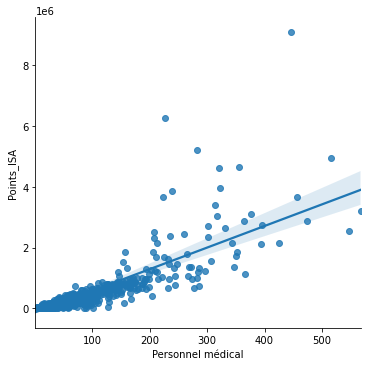

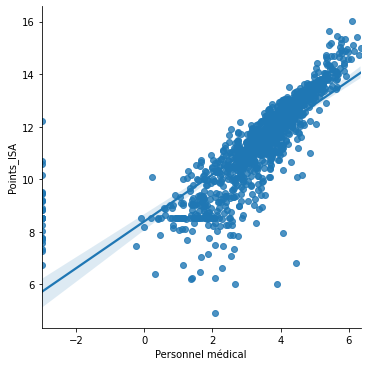

In [13]:

#Pour les médecins salariés, on enlève les valeurs nulles (transformé en log, ce sont les -infini que l'on a recodé en -3) 
# sinon elles baissent artificiellement la droite de régression et rend les graphes moins lisibles

#index_null = df[ df['Personnel Médical'] == 0 ].index
#index_null_log = df_log[ df_log['Personnel Médical'] == -3 ].index

#df_nnull = df.drop(index_null)
#df_log_nnull = df_log.drop(index_null_log)

sns.lmplot(x = 'Personnel médical', y = 'Points_ISA', data = df)
sns.lmplot(x = 'Personnel médical', y = 'Points_ISA', data = df_log)


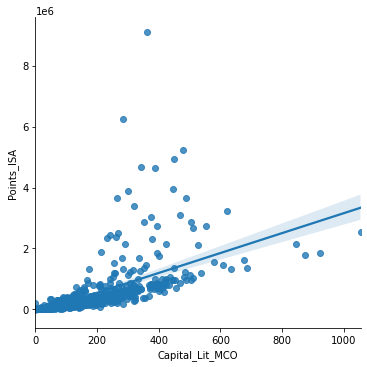

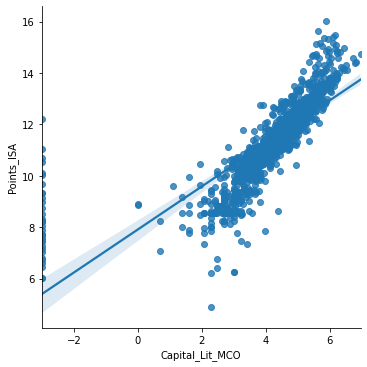

In [14]:
sns.lmplot(x = 'Capital_Lit_MCO', y = 'Points_ISA', data = df)
sns.lmplot(x = 'Capital_Lit_MCO', y = 'Points_ISA', data = df_log)

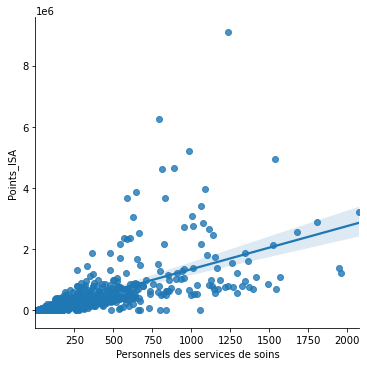

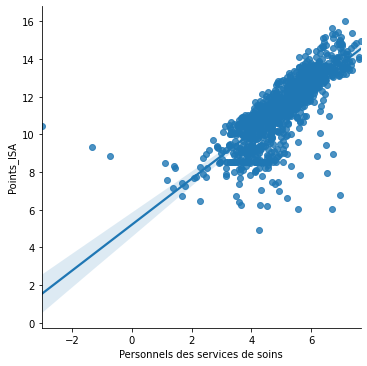

In [15]:
sns.lmplot(x = 'Personnels des services de soins', y = 'Points_ISA', data = df)
sns.lmplot(x = 'Personnels des services de soins', y = 'Points_ISA', data = df_log)

Ces représentations graphiques et régressions montrent bien la pertinence du modèle translog puisque nos variables sont bien plus corrélées log-linéairement que linéairement (avec des coefficients positifs). Cela montre bien que la productivité marginale de chaque facteur de production est positive et décroissante. 

### 2.2 Comparaison entre un modèle de type Cobb-Douglas et un modèle translog

#### Premiers résultats généraux : 

In [20]:
X = dfm[['Personnel médical', 'Personnels de direction et administratifs',
       'Personnels des services de soins', 'Personnels éducatifs et sociaux',
       'Personnels médico-techniques', 'Personnels techniques et ouvriers', 'Internes',  
        'Capital_Lit_MCO', 'Capital_imagerie', 'Capital_Bloc', 'Capital_Examens_biologiques', 'Population']]
X = sm.add_constant(X) # on ajoute une constante, sinon la régression se fait sans, par défaut
y = dfm['Points_ISA']

model = sm.OLS(y, X)
results = model.fit()
print(results.summary())



                            OLS Regression Results                            
Dep. Variable:             Points_ISA   R-squared:                       0.870
Model:                            OLS   Adj. R-squared:                  0.868
Method:                 Least Squares   F-statistic:                     632.4
Date:                Thu, 13 May 2021   Prob (F-statistic):               0.00
Time:                        14:02:58   Log-Likelihood:                -1104.0
No. Observations:                1150   AIC:                             2234.
Df Residuals:                    1137   BIC:                             2300.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                                coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------

On obtient des coefficients en grande majorité significatifs à 5%, on peut donc les interpréter. 

ATTENTION c'est une régression log-log donc les coefficients s'interprètent comme des % : 1% de Xi en plus augmente de beta(Xi)% la production.

On constate qu'avec autant de variables, le modèle translog n'est pas pertinent, les p-values élevées montrent que beaucoup de coefficients ne sont pas significatifs. On garde donc pour le moment le modèle simple.
On souhaite à présent comparer ces variables entre les hôpitaux privés, publics et privés à but non lucratif. 

In [22]:
# 1 public 2 privé lucratif 3 privé non lucratif

index_non_public = dfm[ dfm['stjr'] != 1].index
index_non_privé = dfm[ dfm['stjr'] != 2].index
index_non_pnl = dfm[ dfm['stjr'] != 3].index

dfm_public = dfm.drop(index_non_public)
dfm_privé = dfm.drop(index_non_privé)
dfm_pnl = dfm.drop(index_non_pnl)

In [23]:
print("Nombre d'hôpitaux publics : ", dfm_public['stjr'].count())
print("Nombre d'hôpitaux privés : ", dfm_privé['stjr'].count())
print("Nombre d'hôpitaux privés à but non lucratif : ", dfm_pnl['stjr'].count())

Nombre d'hôpitaux publics :  517
Nombre d'hôpitaux privés :  461
Nombre d'hôpitaux privés à but non lucratif :  172


In [29]:
# Régression sur les hôpitaux publics : 

X = dfm_public[['Personnel médical', 'Personnels de direction et administratifs',
       'Personnels des services de soins', 'Personnels éducatifs et sociaux',
       'Personnels médico-techniques', 'Personnels techniques et ouvriers', 'Internes', 
        'Capital_Lit_MCO', 'Capital_imagerie', 'Capital_Bloc', 'Capital_Examens_biologiques', 'Population']]
X = sm.add_constant(X) # on ajoute une constante, sinon la régression se fait sans, par défaut
y = dfm_public['Points_ISA']

model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:             Points_ISA   R-squared:                       0.926
Model:                            OLS   Adj. R-squared:                  0.925
Method:                 Least Squares   F-statistic:                     528.4
Date:                Thu, 13 May 2021   Prob (F-statistic):          1.96e-276
Time:                        14:04:49   Log-Likelihood:                -426.98
No. Observations:                 517   AIC:                             880.0
Df Residuals:                     504   BIC:                             935.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                                coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------

In [28]:
# Régression sur les hôpitaux privés

X = dfm_privé[['Personnel médical', 'Personnels de direction et administratifs',
       'Personnels des services de soins', 'Personnels éducatifs et sociaux',
       'Personnels médico-techniques', 'Personnels techniques et ouvriers', 'Internes', 
        'Capital_Lit_MCO', 'Capital_imagerie', 'Capital_Bloc', 'Capital_Examens_biologiques', 'Population']]
X = sm.add_constant(X) # on ajoute une constante, sinon la régression se fait sans, par défaut
y = dfm_privé['Points_ISA']

model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:             Points_ISA   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     167.7
Date:                Thu, 13 May 2021   Prob (F-statistic):          3.86e-157
Time:                        14:04:42   Log-Likelihood:                -362.58
No. Observations:                 461   AIC:                             751.2
Df Residuals:                     448   BIC:                             804.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                                coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------

In [27]:
# Régression sur les hôpitaux privés à but non lucratif

X = dfm_pnl[['Personnel médical', 'Personnels de direction et administratifs',
       'Personnels des services de soins', 'Personnels éducatifs et sociaux',
       'Personnels médico-techniques', 'Personnels techniques et ouvriers', 'Internes',
        'Capital_Lit_MCO', 'Capital_imagerie', 'Capital_Bloc', 'Capital_Examens_biologiques', 'Population']]
X = sm.add_constant(X) # on ajoute une constante, sinon la régression se fait sans, par défaut
y = dfm_pnl['Points_ISA']

model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:             Points_ISA   R-squared:                       0.887
Model:                            OLS   Adj. R-squared:                  0.879
Method:                 Least Squares   F-statistic:                     104.4
Date:                Thu, 13 May 2021   Prob (F-statistic):           6.87e-69
Time:                        14:04:22   Log-Likelihood:                -156.90
No. Observations:                 172   AIC:                             339.8
Df Residuals:                     159   BIC:                             380.7
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                                coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------

ATTENTION ces régressions ne sont pas très significatives, voir si on peut arranger avec d'autres variables ! 

### Régression translog

Pour aller plus loin dans l'analyse, on utilise le modèle translog comme fonction de production, ce qui nous permet de calculer des élasticités de substitution notamment. Ce modèle est plutôt plus réaliste que la Cobb-Douglas qui suppose des élasticités de substitution unitaires entre les facteurs (plus rigide). 

In [190]:
df.columns

Index(['Numero_finess', 'Médecins libéraux',
       'Autres personnels médicaux libéraux', 'Médecins salariés',
       'Autres personnels médicaux salariés',
       'Personnels de direction et administratifs',
       'Personnels des services de soins', 'Personnels éducatifs et sociaux',
       'Personnels médico-techniques', 'Personnels techniques et ouvriers',
       'Points_ISA', 'stjr', 'Internes', 'dep', 'Departement', 'COMINSEE',
       'Capital_Lit_MCO', 'Capital_Bloc', 'Capital_imagerie',
       'Capital_Examens_biologiques', 'Capital_telemed', 'SEJHC_MED',
       'SEJHC_CHI', 'SEJHC_OBS', 'SEJHC_MCO', 'Taux_chomage_par_dep',
       'Population', 'Dep Moyenne Salaires Horaires',
       'Dep Moyenne Salaires Cadre Horaires',
       'Dep Moyenne Salaires Prof Intermédiaire Horaires',
       'Dep Moyenne Salaires Employé Horaires',
       'Moyenne Revenus Fiscaux Départementaux', 'Bloc_politique',
       'Personnel médical', 'Autre sans internes',
       'Autre sans direction et ad

In [41]:
X = dfm[['Personnel médical', 'Personnels de direction et administratifs',
       'Personnels des services de soins', 'Autre sans direction et administratif',
        'Capital_Lit_MCO', 'Capital_tech',
        'Capital_tech x Capital_Lit_MCO',
       'Personnels des services de soins x Capital_tech',
       'Personnels des services de soins x Capital_Lit_MCO',
       'Personnels des services de soins x Personnels de direction et administratifs',
       'Personnels des services de soins x Personnel médical',
       'Personnels de direction et administratifs x Capital_tech',
       'Personnels de direction et administratifs x Capital_Lit_MCO',
       'Personnels de direction et administratifs x Personnel médical',
       'Personnel médical x Capital_tech', 'Personnel médical x Capital_Lit_MCO',
        'Capital_tech x Capital_tech', 'Capital_Lit_MCO x Capital_Lit_MCO',
        'Personnel médical x Personnel médical', 
        'Personnels de direction et administratifs x Personnels de direction et administratifs',
        'Personnels des services de soins x Personnels des services de soins',
        'Autre sans direction et administratif x Autre sans direction et administratif',
        'Personnels des services de soins x Autre sans direction et administratif',
        'Capital_tech x Autre sans direction et administratif',
        'Personnels de direction et administratifs x Autre sans direction et administratif',
        'Personnel médical x Autre sans direction et administratif',
        'Capital_Lit_MCO x Autre sans direction et administratif']]

X = sm.add_constant(X) # on ajoute une constante, sinon la régression se fait sans, par défaut
y = dfm['Points_ISA']

model = sm.OLS(y, X)
results = model.fit()
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:             Points_ISA   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.898
Method:                 Least Squares   F-statistic:                     374.3
Date:                Thu, 13 May 2021   Prob (F-statistic):               0.00
Time:                        14:28:32   Log-Likelihood:                -951.39
No. Observations:                1150   AIC:                             1959.
Df Residuals:                    1122   BIC:                             2100.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                                                                                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------

In [42]:
results.params.shape

(28,)

In [93]:
#Pour vérifier la pertinence de notre modèle translog, on effectue un F-test 
# avec comme hypothèse nulle la nullité conjointe de tous les coefficients croisés

F_test_x = np.array(([0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0, 0, 0],
                     [0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0, 0, 0],
                     [0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0, 0, 0],
                     [0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0, 0, 0],
                     [0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0, 0, 0],
                     [0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0, 0, 0],
                     [0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0, 0, 0],
                     [0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0, 0, 0],
                     [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0, 0, 0],
                     [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0, 0, 0],
                     [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0, 0, 0],
                     [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0, 0, 0],
                     [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0, 0, 0],
                     [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0, 0, 0],
                     [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0, 0, 0],
                     [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0, 0, 0],
                     [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0, 0, 0],
                     [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0, 0, 0],
                     [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1, 0, 0],
                     [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0, 1, 0],
                     [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0, 0, 1],
                   ))
print(results.f_test(F_test_x))

#On a bien une p-valeur très inférieure à 0.05

<F test: F=array([[44.19643437]]), p=9.455735788243725e-131, df_denom=1.12e+03, df_num=21>


La p-valeur est largement inférieure à 0.05 donc la prise en compte des coefficients croisés est bien justifiée. 

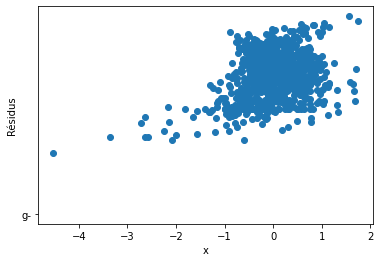

In [48]:
#On étudie les résidus (A REFAIRE)

plt.plot(dfm['Points_ISA'] - (results.params[0] + results.params[1]*dfm['Personnel médical'] + results.params[2]*dfm['Personnels de direction et administratifs'] + results.params[3]*dfm['Personnels des services de soins'] +
                                                 results.params[4]*dfm['Autre sans direction et administratif'] + results.params[5]*dfm['Capital_Lit_MCO'] + results.params[6]*dfm['Capital_tech'] + results.params[7]*dfm['Capital_tech x Capital_Lit_MCO'] +
                                                 results.params[8]*dfm['Personnels des services de soins x Capital_tech'] + results.params[9]*dfm['Personnels des services de soins x Capital_Lit_MCO'] + results.params[10]*dfm['Personnels des services de soins x Personnels de direction et administratifs'] + results.params[11]*dfm['Personnels des services de soins x Personnel médical'] +
                                                 results.params[12]*dfm['Personnels de direction et administratifs x Capital_tech'] + results.params[13]*dfm['Personnels de direction et administratifs x Capital_Lit_MCO'] + results.params[14]*dfm['Personnels de direction et administratifs x Personnel médical'] + results.params[15]*dfm['Personnel médical x Capital_tech'] +
                                                 results.params[16]*dfm['Personnel médical x Capital_Lit_MCO'] + results.params[17]*dfm['Capital_tech x Capital_tech'] + results.params[18]*dfm['Capital_Lit_MCO x Capital_Lit_MCO'] + results.params[19]*dfm['Personnel médical x Personnel médical'] +
                                                 results.params[20]*dfm['Personnels de direction et administratifs x Personnels de direction et administratifs'] + results.params[21]*dfm['Personnels des services de soins x Personnels des services de soins'] + results.params[22]*dfm['Autre sans direction et administratif x Autre sans direction et administratif'] + results.params[23]*dfm['Personnels des services de soins x Autre sans direction et administratif'] +
                                                 results.params[24]*dfm['Capital_tech x Autre sans direction et administratif'] + results.params[25]*dfm['Personnels de direction et administratifs x Autre sans direction et administratif'] + results.params[26]*dfm['Personnel médical x Autre sans direction et administratif'] + results.params[27]*dfm['Capital_Lit_MCO x Autre sans direction et administratif']),
                                                 dfm['Points_ISA'], 'o', "g-", label="residus")
plt.xlabel("x")
plt.ylabel("Résidus")
plt.show()

In [84]:
#On crée une dataframe pour calculer les élasticités de tous nos facteurs de production

df_el = pd.DataFrame()

df_el = df_el.assign(el_med = results.params[1] + results.params[11] * dfm['Personnels des services de soins']
+ results.params[14] * dfm['Personnels de direction et administratifs']
+ results.params[15] * dfm['Capital_tech']
+ results.params[16] * dfm['Capital_Lit_MCO']
+ results.params[19] * dfm['Personnel médical'] * 2
+ results.params[26] * dfm['Autre sans direction et administratif'])

df_el = df_el.assign(el_captech = results.params[6] + results.params[7] * dfm['Capital_Lit_MCO']
+ results.params[8] * dfm['Personnels des services de soins']
+ results.params[12] * dfm['Personnels de direction et administratifs']
+ results.params[15] * dfm['Personnel médical']
+ results.params[17] * dfm['Capital_tech']*2
+ results.params[24] * dfm['Autre sans direction et administratif'])

df_el = df_el.assign(el_adm = results.params[2] + results.params[10]*dfm['Personnels des services de soins'] + results.params[12]*dfm['Capital_tech']
+ results.params[13]*dfm['Capital_Lit_MCO']
+ results.params[14]*dfm['Personnel médical']
+ results.params[20]*dfm['Personnels de direction et administratifs'] *2
+ results.params[25]*dfm['Autre sans direction et administratif'])

df_el = df_el.assign(el_soins = results.params[3] + results.params[8]*dfm['Capital_tech']
+ results.params[9]*dfm['Capital_Lit_MCO']
+ results.params[10]*dfm['Personnels de direction et administratifs']
+ results.params[11]*dfm['Personnel médical']
+ results.params[21]*dfm['Personnels des services de soins']*2
+ results.params[23]*dfm['Autre sans direction et administratif'])

df_el = df_el.assign(el_lits = results.params[5] + results.params[7]*dfm['Capital_tech']
+ results.params[9]*dfm['Personnels des services de soins']
+ results.params[13]*dfm['Personnels de direction et administratifs']
+ results.params[16]*dfm['Personnel médical']
+ results.params[18]*dfm['Capital_Lit_MCO']*2
+ results.params[27]*dfm['Autre sans direction et administratif'])

df_el


,el_med,el_captech,el_adm,el_soins,el_lits
0,0.704132,0.281095,-0.207638,0.161512,-0.524083
1,0.654514,-0.002193,-0.428457,0.259799,0.506738
2,0.294009,0.119350,0.000230,-0.082497,0.749069
3,0.715679,-0.045673,-0.462829,0.074715,0.802318
4,0.427941,0.034908,-0.080056,-0.185986,1.030570
...,...,...,...,...,...
1145,0.491969,-0.000003,-0.001362,-0.217328,1.052639
1146,0.373287,0.078686,0.100440,-0.229368,0.899403
1147,0.485621,0.050559,0.080028,0.138809,0.474979
1148,0.407036,0.171043,-0.068030,-0.268608,0.706399


In [92]:
#Calcul des élasticités de substitution (définition de McFadden, 1963)

df_el = df_el.assign(es_med_captech = (df_el['el_med'] + df_el['el_captech']) / (df_el['el_med'] + df_el['el_captech']
                                                                        + 2*results.params[15]
                                                                        - 2*results.params[6]*df_el['el_captech']/df2['el_med']
                                                                        - 2*results.params[1]*df_el['el_med']/df_el['el_captech']))

df_el = df_el.assign(es_med_lits = (df_el['el_med'] + df_el['el_lits']) / (df_el['el_med'] + df_el['el_lits']
                                                                        + 2*results.params[16]
                                                                        - 2*results.params[5]*df_el['el_lits']/df_el['el_med']
                                                                        - 2*results.params[1]*df_el['el_med']/df_el['el_lits']))

df_el = df_el.assign(es_med_soins = (df_el['el_med'] + df_el['el_soins']) / (df_el['el_med'] + df_el['el_soins']
                                                                        + 2*results.params[11]
                                                                        - 2*results.params[3]*df_el['el_soins']/df_el['el_med']
                                                                        - 2*results.params[1]*df_el['el_med']/df_el['el_soins']))

df_el = df_el.assign(es_med_adm = (df_el['el_med'] + df_el['el_adm']) / (df_el['el_med'] + df_el['el_adm']
                                                                        + 2*results.params[14]
                                                                        - 2*results.params[2]*df_el['el_adm']/df_el['el_med']
                                                                        - 2*results.params[1]*df_el['el_med']/df_el['el_adm']))

df_el = df_el.assign(es_adm_soins = (df_el['el_adm'] + df_el['el_soins']) / (df_el['el_soins'] + df_el['el_adm']
                                                                        + 2*results.params[10]
                                                                        - 2*results.params[3]*df_el['el_soins']/df_el['el_adm']
                                                                        - 2*results.params[2]*df_el['el_adm']/df_el['el_soins']))

df_el = df_el.assign(es_adm_captech = (df_el['el_adm'] + df_el['el_captech']) / (df_el['el_adm'] + df_el['el_captech']
                                                                        + 2*results.params[12]
                                                                        - 2*results.params[6]*df_el['el_captech']/df_el['el_adm']
                                                                        - 2*results.params[2]*df_el['el_adm']/df_el['el_captech']))

df_el = df_el.assign(es_adm_lits = (df_el['el_adm'] + df_el['el_lits']) / (df_el['el_adm'] + df_el['el_lits']
                                                                        + 2*results.params[13]
                                                                        - 2*results.params[5]*df_el['el_lits']/df_el['el_adm']
                                                                        - 2*results.params[2]*df_el['el_adm']/df_el['el_lits']))

df_el = df_el.assign(es_soins_captech = (df_el['el_soins'] + df_el['el_captech']) / (df_el['el_soins'] + df_el['el_captech']
                                                                        + 2*results.params[8]
                                                                        - 2*results.params[6]*df_el['el_captech']/df_el['el_soins']
                                                                        - 2*results.params[3]*df_el['el_soins']/df_el['el_captech']))

df_el = df_el.assign(es_soins_lits = (df_el['el_soins'] + df_el['el_lits']) / (df_el['el_soins'] + df_el['el_lits']
                                                                        + 2*results.params[9]
                                                                        - 2*results.params[5]*df_el['el_lits']/df_el['el_soins']
                                                                        - 2*results.params[3]*df_el['el_soins']/df_el['el_lits']))
df_el.mean()

el_med               0.481600
el_captech           0.036770
el_adm              -0.106133
el_soins             0.007405
el_lits              0.751911
es_med_captech      -0.043569
es_med_lits        -10.744635
es_med_soins        -0.126262
es_med_adm          -0.015795
es_adm_soins         0.455342
es_adm_captech      -0.641059
es_adm_lits         -1.973835
es_soins_captech    -2.253814
es_soins_lits       -0.893361
dtype: float64

Brouillon

In [59]:
dfm.groupby('Bloc_politique').count()

,Capital_tech x Capital_tech,Capital_tech x Autres_personnels_médicaux,LIT_MCO x Capital_tech,LIT_MCO x LIT_MCO,LIT_MCO x Internes,LIT_MCO x Autres_personnels_médicaux,Internes x Capital_tech,Internes x Internes,Internes x Autres_personnels_médicaux,Personnels techniques et ouvriers x Capital_tech,...,Q1_B,Q1_C,Q1_D,Q8_A,Q8_B,Q8_C,Q8_D,Capital_tech,Médecins,Autres_personnels_médicaux
Bloc_politique,,,,,,,,,,,,,,,,,,,,,
Centre droit à droite,145,145,145,145,145,145,145,145,145,145,...,145,145,145,145,145,145,145,145,145,145
Centre gauche à centre droit,550,550,550,550,550,550,550,550,550,550,...,550,550,550,550,550,550,550,550,550,550
Droite à extrême droite,286,286,286,286,286,286,286,286,286,286,...,286,286,286,286,286,286,286,286,286,286
Extrême gauche à gauche,174,174,174,174,174,174,174,174,174,174,...,174,174,174,174,174,174,174,174,174,174


In [61]:
dfm.groupby('Bloc_politique').count()
index_g = dfm[ dfm['Bloc_politique'] == 'Droite à extrême droite'].index
index_g_bis = dfm[ dfm['Bloc_politique'] == 'Centre droit à droite'].index

dfm_gauche = dfm.drop(index_g)
dfm_g = dfm_gauche.drop(index_g_bis)

In [62]:
X = dfm_g[['Personnels des services de soins', 'Personnels de direction et administratifs',
        'LIT_MCO', 'Capital_Bloc', 'Capital_Examens_biologiques', 'Taux_chomage_par_dep']]
X = sm.add_constant(X) # on ajoute une constante, sinon la régression se fait sans, par défaut
y = dfm_g['Personnels médico-techniques']

model = sm.OLS(y, X)
results = model.fit()
print(results.summary())
results.params

                                 OLS Regression Results                                 
Dep. Variable:     Personnels médico-techniques   R-squared:                       0.702
Model:                                      OLS   Adj. R-squared:                  0.700
Method:                           Least Squares   F-statistic:                     281.8
Date:                          Tue, 11 May 2021   Prob (F-statistic):          8.04e-185
Time:                                  15:30:54   Log-Likelihood:                -1083.4
No. Observations:                           724   AIC:                             2181.
Df Residuals:                               717   BIC:                             2213.
Df Model:                                     6                                         
Covariance Type:                      nonrobust                                         
                                                coef    std err          t      P>|t|      [0.025      0.975]


const                                       -3.356709
Personnels des services de soins             0.534535
Personnels de direction et administratifs    0.590766
LIT_MCO                                      0.101897
Capital_Bloc                                 0.024187
Capital_Examens_biologiques                  0.059394
Taux_chomage_par_dep                        -0.008047
dtype: float64

In [198]:
results.params

const                                                                                    7.036347
Personnel médical                                                                        0.667485
Personnels de direction et administratifs                                               -0.131552
Personnels des services de soins                                                         0.034772
Autre sans direction et administratif                                                    0.122584
Capital_Lit_MCO                                                                          0.145693
Capital_tech                                                                             0.083907
Capital_tech x Capital_Lit_MCO                                                          -0.046551
Personnels des services de soins x Capital_tech                                          0.048466
Personnels des services de soins x Capital_Lit_MCO                                      -0.031553
Personnels des servi

In [220]:
df2 = df.assign(infl_med_captech = (dfm['Points_ISA']/(dfm['Personnel médical']*dfm['Capital_tech'])) * (results.params[15]
            + (results.params[1] + results.params[11] * dfm['Personnels des services de soins']
                + results.params[14] * dfm['Personnels de direction et administratifs']
                + results.params[15] * dfm['Capital_tech']
                + results.params[16] * dfm['Capital_Lit_MCO']
                + results.params[19] * dfm['Personnel médical']
                + results.params[26] * dfm['Autre sans direction et administratif'])
                *(results.params[6] + results.params[7] * dfm['Capital_Lit_MCO']
                 + results.params[8] * dfm['Personnels des services de soins']
                  + results.params[12] * dfm['Personnels de direction et administratifs']
                  + results.params[15] * dfm['Personnel médical']
                  + results.params[17] * dfm['Capital_tech']
                  + results.params[24] * dfm['Autre sans direction et administratif']))     )

df2['infl_med_captech']

0            inf
1       0.002226
2      -0.169636
3      -0.001650
4       0.024291
          ...   
1145    0.010116
1146   -0.028245
1147    0.041596
1148   -0.058501
1149    0.002869
Name: infl_med_captech, Length: 1150, dtype: float64